# Pymaceuticals Inc.
---

### Analysis

- Based on our results we can extract a few particularly noteworthy insights from the data:

    - Capomulin and Ramicane appear to be more effective at reducing tumor volume over a given timepoint span than Infubinol and Ceftamin. 

    - There is a positive correlation between the weight of a mouse and the average tumor size. As the weight of a mouse increases, we can compute a line of best fit to predict the corresponding increase in average tumor size. 
    
    - Different drugs can vary in their consistency in altering tumor size. For example, Capomulin and Ramicane have a relatively narrow IQR, while Ceftamin has a noticeably wider IQR indicating a greater degree of variability in the final tumor size. 

In [377]:
# Dependencies and Setup - matplotlib for visual display, pandas for processing tables and scipy for calculating IQR and outliers 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [378]:
len(combined_data["Mouse ID"].unique())

249

In [379]:
combined_data['Mouse ID'].nunique()

249

In [380]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_row_series = combined_data.duplicated(["Mouse ID", "Timepoint"])
duplicated_row_series

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [381]:
sum(duplicated_row_series)

5

In [382]:
combined_data[duplicated_row_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [383]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = combined_data[duplicated_row_series]['Mouse ID'].unique()
bad_mice_series = combined_data['Mouse ID'].isin(duplicate_mouse_ids)
combined_data.loc[bad_mice_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [384]:
len(combined_data.loc[bad_mice_series])

13

In [385]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_data[~bad_mice_series]
print(clean_combined_df.shape)
clean_combined_df.head()

(1880, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [386]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df['Mouse ID'].unique())

248

## Summary Statistics

In [387]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_volume_groupby = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_summary_statistics = pd.DataFrame({
    'mean': drug_volume_groupby.mean(),
    'median': drug_volume_groupby.median(),
    'var': drug_volume_groupby.var(),
    'standard deviation': drug_volume_groupby.std(),
    'SEM': drug_volume_groupby.sem()
})

drug_summary_statistics

,mean,median,var,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [388]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [389]:
clean_combined_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

In [390]:
clean_combined_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [391]:
clean_combined_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

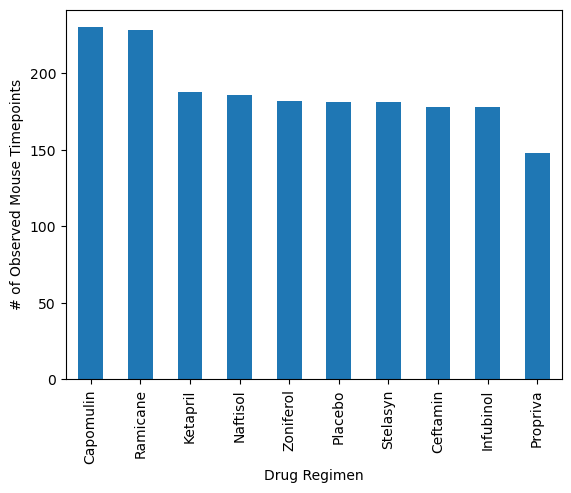

In [392]:
drug_counts_gb = clean_combined_df.groupby('Drug Regimen')
drug_counts = drug_counts_gb['Drug Regimen'].count().sort_values(ascending=False)
drug_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

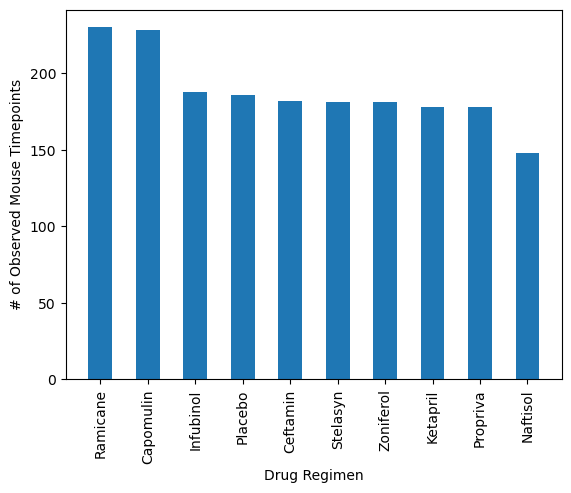

In [393]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=clean_combined_df['Drug Regimen'].unique(), height=clean_combined_df['Drug Regimen'].value_counts().sort_values(ascending=False), width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')

<Axes: ylabel='Sex'>

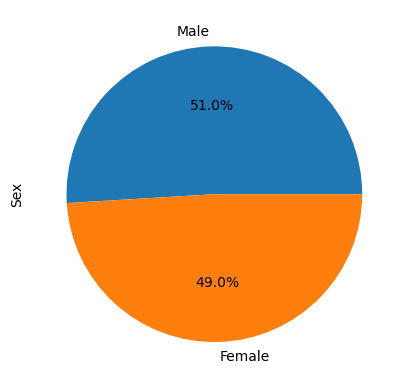

In [394]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts_gb = clean_combined_df.groupby('Sex')
gender_counts = gender_counts_gb['Sex'].count().sort_values(ascending=False)
gender_counts.plot(kind='pie', autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

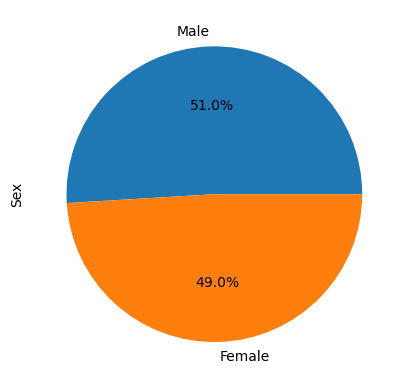

In [395]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_combined_df['Sex'].value_counts(), autopct="%1.1f%%", labels=clean_combined_df['Sex'].unique())
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [396]:
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [397]:
"""
Preparing the data for determining the tumor volume at the last timepoint for each mouse.
"""

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_combined_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volumes_df = pd.merge(clean_combined_df, final_timepoints, on=["Mouse ID", 'Timepoint'])

final_volumes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [398]:
# Put treatments into a list [Capomulin, Ramicane, Infubinol, and Ceftamin] for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with Series of tumor vol data (for plotting)
vol_data = []

In [399]:
"""
Populate the two lists above with the corresponding data. 
"""

for treatment in treatment_list:

    # locate the rows which contain mice on each drug and get the tumor volumes - as a Series
    treatment_tumor_volumes = final_volumes_df.loc[final_volumes_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # Add the Series (add the tumor volumes for this drug to the volume list)
    vol_data.append(treatment_tumor_volumes)

    # Calculate the IQR for this drug
    quartiles = treatment_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outliers = []

    for volume in treatment_tumor_volumes:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)

    print(f"The potential outliers are: {outliers}")

    print("\n---------------------------\n")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The potential outliers are: []

---------------------------

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The potential outliers are: []

---------------------------

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outl

Text(0, 0.5, 'Final Tumor Volume (mm3)')

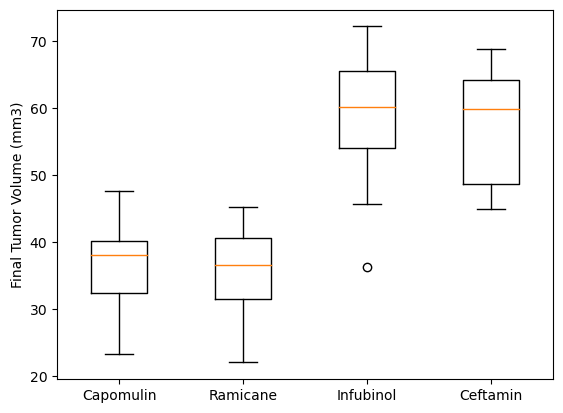

In [400]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol_data, labels=treatment_list)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

In [401]:
capomulin_mice = clean_combined_df[clean_combined_df['Drug Regimen'] == 'Capomulin']

In [402]:
mouse_s185_data = clean_combined_df[clean_combined_df['Mouse ID'] == 's185']

<Axes: title={'center': 'Capomulin Treatment of Mouse s185'}, xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)'>

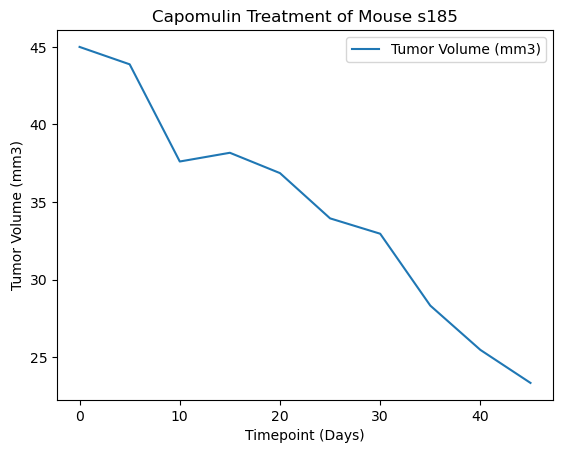

In [403]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_s185_data.plot(kind="line", x='Timepoint', y='Tumor Volume (mm3)', xlabel="Timepoint (Days)", ylabel="Tumor Volume (mm3)", title="Capomulin Treatment of Mouse s185")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

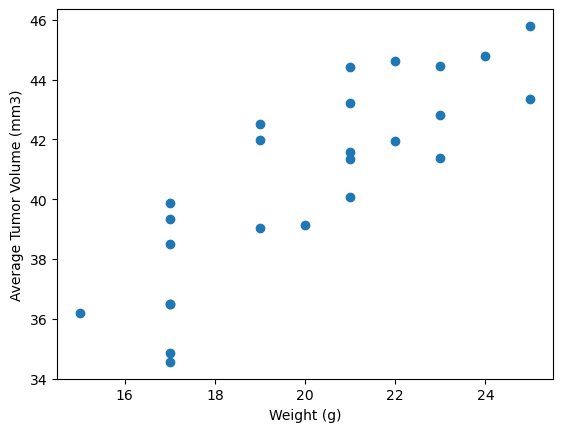

In [404]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_ID_gb = capomulin_mice.groupby("Mouse ID")

mouse_weights = mouse_ID_gb["Weight (g)"].unique().explode().astype("float")
mouse_average_volume = mouse_ID_gb["Tumor Volume (mm3)"].mean()

plt.scatter(x=mouse_weights, y=mouse_average_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [405]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(mouse_weights, mouse_average_volume)[0], 2)
print(f"The correlation between mouse weight and average observed tumor volume is: {correlation}")

The correlation between mouse weight and average observed tumor volume is: 0.84


In [407]:
wv_slope, wv_int, wv_r, wv_p, wv_std_err = st.linregress(mouse_weights, mouse_average_volume)

wv_fit = wv_slope * mouse_weights + wv_int

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


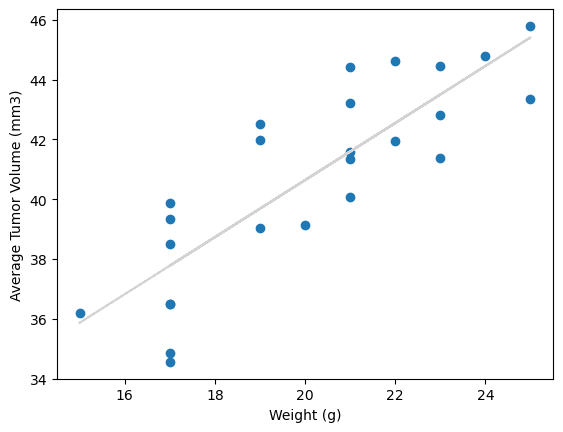

In [410]:
plt.scatter(x=mouse_weights, y=mouse_average_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(mouse_weights, wv_fit, "--", color="lightgray")